In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
from helpers import *
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
spx = yf.Ticker('^SPX')
ndx = yf.Ticker('^NDX')

In [9]:
spx_calls = spx.option_chain('2024-03-07').calls
spx_puts = spx.option_chain('2024-03-07').puts

ndx_calls = ndx.option_chain('2024-03-07').calls
ndx_puts = ndx.option_chain('2024-03-07').puts


In [10]:
from datetime import datetime, timedelta, date, timezone

spx_calls['lastTradeDate'] = spx_calls.apply(lambda x: x['lastTradeDate'].to_pydatetime(), axis=1)
spx_puts['lastTradeDate'] = spx_puts.apply(lambda x: x['lastTradeDate'].to_pydatetime(), axis=1)
ndx_calls['lastTradeDate'] = ndx_calls.apply(lambda x: x['lastTradeDate'].to_pydatetime(), axis=1)
ndx_puts['lastTradeDate'] = ndx_puts.apply(lambda x: x['lastTradeDate'].to_pydatetime(), axis=1)

In [11]:
spx_calls = spx_calls[spx_calls['lastTradeDate']>datetime(2024, 3, 6, tzinfo = timezone.utc)].sort_values(by=['strike']).reset_index(drop=True)
ndx_calls = ndx_calls[ndx_calls['lastTradeDate']>datetime(2024, 3, 6, tzinfo = timezone.utc)].sort_values(by=['strike']).reset_index(drop=True)
spx_puts = spx_puts[spx_puts['lastTradeDate']>datetime(2024, 3, 6, tzinfo = timezone.utc)].sort_values(by=['strike']).reset_index(drop=True)
ndx_puts = ndx_puts[ndx_puts['lastTradeDate']>datetime(2024, 3, 6, tzinfo = timezone.utc)].sort_values(by=['strike']).reset_index(drop=True)

In [12]:
spx_calls['midprice'] = spx_calls.apply(lambda x: (x['bid'] + x['ask'])/2, axis=1)
ndx_calls['midprice'] = ndx_calls.apply(lambda x: (x['bid'] + x['ask'])/2, axis=1)
spx_puts['midprice'] = spx_puts.apply(lambda x: (x['bid'] + x['ask'])/2, axis=1)
ndx_puts['midprice'] = ndx_puts.apply(lambda x: (x['bid'] + x['ask'])/2, axis=1)

In [13]:
ndx_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,midprice
0,NDXP240307C16675000,2024-03-06 15:42:30+00:00,16675.0,1328.20,1392.80,1416.90,160.699950,13.764450,1.0,0,0.865022,True,REGULAR,USD,1404.850
1,NDXP240307C17600000,2024-03-06 15:51:22+00:00,17600.0,453.73,479.80,497.80,95.730010,26.740227,NaN,2,0.437719,True,REGULAR,USD,488.800
2,NDXP240307C17890000,2024-03-06 15:00:12+00:00,17890.0,154.62,208.50,216.70,58.019997,60.062107,4.0,5,0.269867,True,REGULAR,USD,212.600
3,NDXP240307C17900000,2024-03-06 15:29:30+00:00,17900.0,148.31,200.00,206.80,68.460000,85.735756,14.0,7,0.262714,True,REGULAR,USD,203.400
4,NDXP240307C17910000,2024-03-06 15:29:30+00:00,17910.0,141.65,190.70,197.20,34.249992,31.890123,11.0,5,0.256058,True,REGULAR,USD,193.950
5,NDXP240307C17950000,2024-03-06 14:52:33+00:00,17950.0,150.10,161.50,167.50,52.750008,54.185940,2.0,6,0.245037,True,REGULAR,USD,164.500
6,NDXP240307C17970000,2024-03-06 15:34:19+00:00,17970.0,107.00,143.50,149.00,38.400000,55.976680,12.0,15,0.231442,True,REGULAR,USD,146.250
7,NDXP240307C17975000,2024-03-06 15:48:43+00:00,17975.0,111.80,135.40,152.40,25.910004,30.166498,2.0,11,0.243191,True,REGULAR,USD,143.900
8,NDXP240307C17990000,2024-03-06 15:42:36+00:00,17990.0,94.00,128.40,133.80,46.840000,99.321460,62.0,61,0.223389,True,REGULAR,USD,131.100
9,NDXP240307C18000000,2024-03-06 16:03:40+00:00,18000.0,123.78,125.10,131.20,69.080000,126.288860,81.0,64,0.228451,True,REGULAR,USD,128.150


In [21]:
ndx_calls = ndx_calls[['strike', 'bid', 'midprice', 'ask', 'impliedVolatility']]
spx_calls = spx_calls[['strike', 'bid', 'midprice', 'ask', 'impliedVolatility']]
ndx_puts = ndx_puts[['strike', 'bid', 'midprice', 'ask', 'impliedVolatility']]
spx_puts = spx_puts[['strike', 'bid', 'midprice', 'ask', 'impliedVolatility']]

In [22]:
spx_calls

,strike,bid,midprice,ask,impliedVolatility
0,4300.0,786.9,787.950,789.00,1.717378
1,4475.0,612.1,613.200,614.30,1.398379
2,4690.0,398.7,399.800,400.90,1.015966
3,4700.0,387.2,388.250,389.30,0.978852
4,4800.0,287.0,288.150,289.30,0.784502
...,...,...,...,...,...
70,5265.0,0.0,0.025,0.05,0.189461
71,5275.0,0.0,0.025,0.05,0.198250
72,5285.0,0.0,0.025,0.05,0.206063
73,5300.0,0.0,0.025,0.05,0.218270


In [22]:
'''
This cell of code is taken from David Duarte's answer on StackOverflow 
https://stackoverflow.com/questions/61289020/fast-implied-volatility-calculation-in-python
'''

from scipy.stats import norm
N = norm.cdf

def bs_call(S, K, T, r, vol):
    d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)

def bs_put(S, K, T, r, vol):
    d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return np.exp(-r * T) * K * norm.cdf(-d2) - S * norm.cdf(-d1)
    
def bs_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def find_vol_call(target_value, S, K, T, r, *args):
    MAX_ITERATIONS = 10000
    PRECISION = 1.0e-5
    sigma = 0.5
    for i in range(0, MAX_ITERATIONS):
        price = bs_call(S, K, T, r, sigma)
        vega = bs_vega(S, K, T, r, sigma)
        diff = target_value - price  # our root
        if (abs(diff) < PRECISION):
            return sigma
        sigma = sigma + diff/vega # f(x) / f'(x)
    return sigma # value wasn't found, return best guess so far

def find_vol_put(target_value, S, K, T, r, *args):
    MAX_ITERATIONS = 10000
    PRECISION = 1.0e-5
    sigma = 0.5
    for i in range(0, MAX_ITERATIONS):
        price = bs_put(S, K, T, r, sigma)
        vega = bs_vega(S, K, T, r, sigma)
        diff = target_value - price  # our root
        if (abs(diff) < PRECISION):
            return sigma
        sigma = sigma + diff/vega # f(x) / f'(x)
    return sigma # value wasn't found, return best guess so far

In [23]:
annualized_rate = .05374
r = np.log(1+annualized_rate)

In [30]:
r

0.05234574037193529

In [25]:
spx_calls['est_iv'] = spx_calls.apply(lambda x: find_vol(x['midprice'], 5078.65, x['strike'], 1/252, r) , axis=1)

/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_11094/4260677647.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = sigma + diff/vega # f(x) / f'(x)
/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_11094/4260677647.py:10: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_11094/4260677647.py:15: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_11094/906340853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx_calls['est_iv'] 

In [26]:
spx_calls

,strike,bid,midprice,ask,impliedVolatility,est_iv
0,4300.0,786.9,787.950,789.00,1.717378,NaN
1,4475.0,612.1,613.200,614.30,1.398379,NaN
2,4690.0,398.7,399.800,400.90,1.015966,0.904574
3,4700.0,387.2,388.250,389.30,0.978852,0.851422
4,4800.0,287.0,288.150,289.30,0.784502,0.666667
...,...,...,...,...,...,...
70,5265.0,0.0,0.025,0.05,0.189461,0.190534
71,5275.0,0.0,0.025,0.05,0.198250,0.199714
72,5285.0,0.0,0.025,0.05,0.206063,0.208842
73,5300.0,0.0,0.025,0.05,0.218270,0.222444


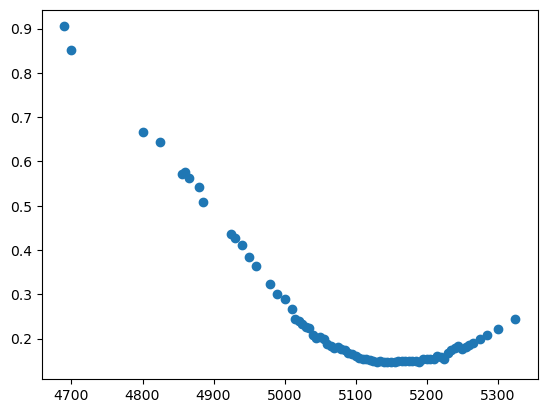

In [27]:
plt.scatter(spx_calls['strike'], spx_calls['est_iv'])

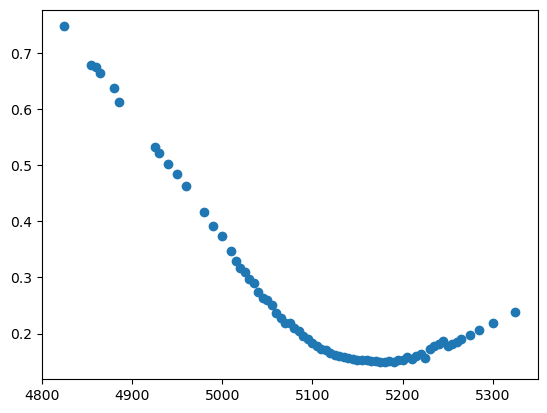

In [34]:
plt.scatter(spx_calls[spx_calls['strike']>4800]['strike'], spx_calls[spx_calls['strike']>4800]['impliedVolatility'])

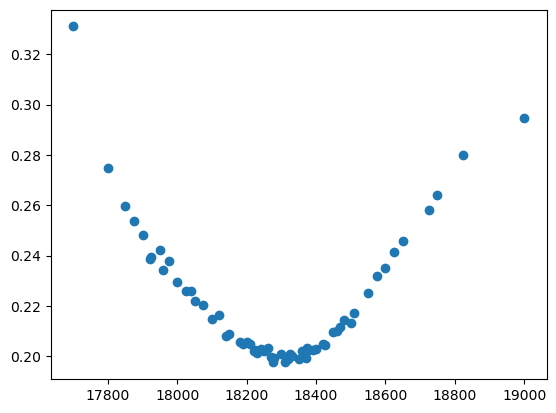

In [33]:
plt.scatter(ndx_calls[ndx_calls['strike'] > 17500]['strike'], ndx_calls[ndx_calls['strike'] > 17500]['impliedVolatility'])

In [29]:
spx_calls.describe()

,strike,bid,midprice,ask,impliedVolatility,est_iv
count,75.000000,75.000000,75.000000,75.000000,75.000000,73.000000
mean,5068.600000,75.837333,76.240333,76.643333,0.329004,0.255874
std,180.203639,139.528400,139.871220,140.214832,0.288515,0.169133
min,4300.000000,0.000000,0.025000,0.050000,0.148446,0.146089
25%,5005.000000,0.150000,0.175000,0.200000,0.160859,0.153897
50%,5100.000000,11.900000,11.950000,12.000000,0.204674,0.181639
75%,5192.500000,83.600000,84.450000,85.300000,0.359778,0.244909
max,5325.000000,786.900000,787.950000,789.000000,1.717378,0.904574


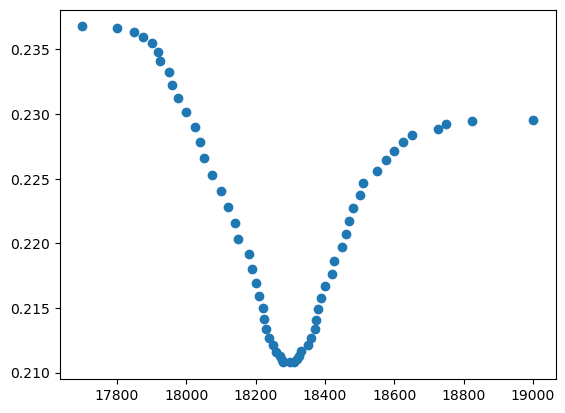

In [77]:
from scipy.ndimage import gaussian_filter1d
#ndx value 17897.87

#plt.scatter(ndx_calls[ndx_calls['strike'] > 17500]['strike'], ndx_calls[ndx_calls['strike'] > 17500]['impliedVolatility'])
y = gaussian_filter1d(ndx_calls[ndx_calls['strike'] > 17500]['impliedVolatility'], 14)
plt.scatter(ndx_calls[ndx_calls['strike'] > 17500]['strike'], y)
plt.show()

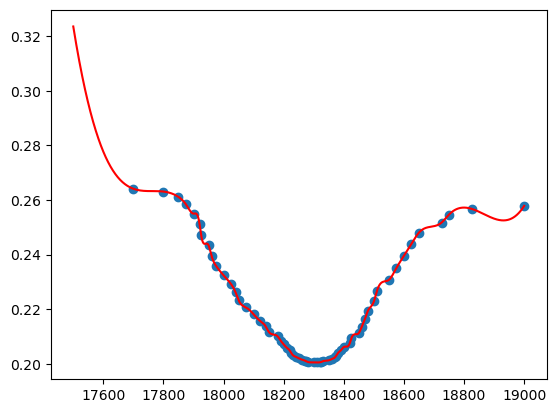

In [69]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(ndx_calls[ndx_calls['strike'] > 17500]['strike'], y)
strike_ar = np.linspace(17500, 19000, 1501)

y_interp = cs(strike_ar)
plt.scatter(ndx_calls[ndx_calls['strike'] > 17500]['strike'], y)
plt.plot(strike_ar, y_interp, c='r')



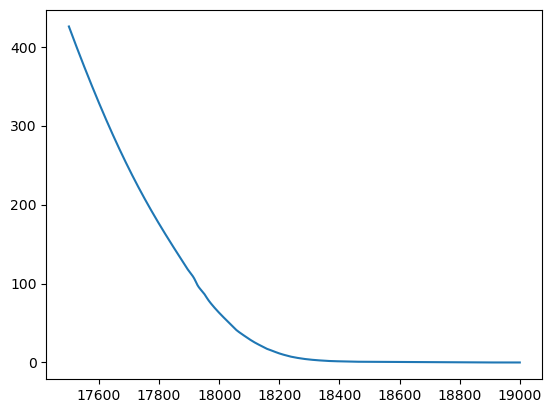

In [70]:
d = {'strike': [], 'price': []}
for x in np.linspace(17500, 19000, 30002):
    iv = cs(x)
    pr = bs_call(17897.87, x, 1/252, r, iv)
    d['strike'].append(x)
    d['price'].append(pr)
df = pd.DataFrame(data=d)
plt.plot(df['strike'], df['price'])

In [71]:
sp_ar = np.linspace(17500, 19000, 1000000)
prices = []
fd = []
sd = []

for x in sp_ar:
    iv = cs(x)
    pr = bs_call(17897.87, x, 1/252, r, iv)
    prices.append(pr)


In [72]:
for i in range(sp_ar.shape[0]):
    if i == 0:
        delta = sp_ar[1] - sp_ar[0]
        rise = prices[1] - prices[0]
        fd.append(rise/delta)
    elif i == sp_ar.shape[0] - 1:
        delta = sp_ar[i] - sp_ar[i-1]
        rise = prices[i] - prices[i-1]
        fd.append(rise/delta)
    else:
        delta = sp_ar[i+1] - sp_ar[i-1]
        rise = prices[i+1] - prices[i-1]
        fd.append(rise/delta)

for i in range(sp_ar.shape[0]):
    if i == 0:
        delta = sp_ar[1] - sp_ar[0]
        rise = fd[1] - fd[0]
        sd.append(rise/delta)
    elif i == sp_ar.shape[0] - 1:
        delta = sp_ar[i] - sp_ar[i-1]
        rise = fd[i] - fd[i-1]
        sd.append(rise/delta)
    else:
        delta = sp_ar[i+1] - sp_ar[i-1]
        rise = fd[i+1] - fd[i-1]
        sd.append(rise/delta)

pdf = sd

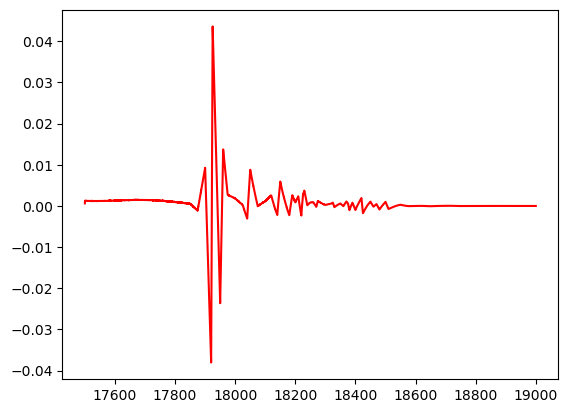

In [73]:
plt.plot(sp_ar, pdf, c='r')

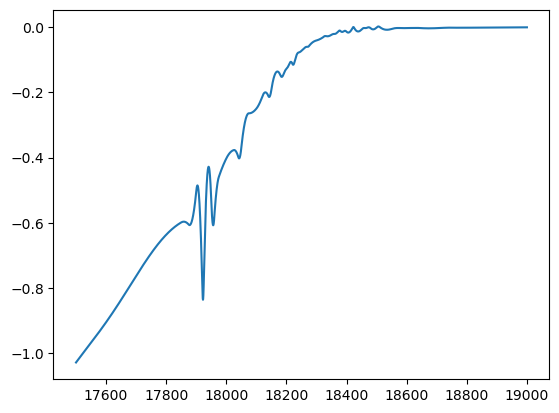

In [74]:
plt.plot(sp_ar, fd)

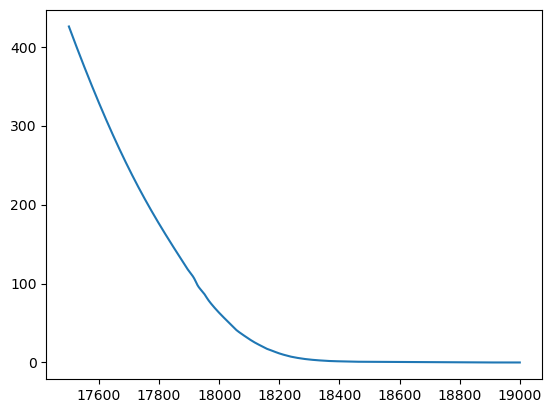

In [78]:
plt.plot(sp_ar, prices)

In [79]:
np.polyfit(np.log(sp_ar), prices, 1)

array([-4161.44422121, 40909.2353893 ])

In [81]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

popt, pcov = curve_fit(func, sp_ar, prices)

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [82]:
popt

array([ 1.        ,  1.        , 78.64806564])

In [14]:
spy = yf.Ticker('SPY').option_chain('2024-03-07')

In [16]:
spy_calls = spy.calls
spy_puts = spy.puts


In [18]:
spy_calls[(spy_calls['strike'] > 450) & (spy_calls['strike'] < 520)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
4,SPY240307C00451000,2024-03-04 14:30:01+00:00,451.0,61.52,59.35,59.63,0.000000,0.000000,1.0,1,1.174321,True,REGULAR,USD
5,SPY240307C00460000,2024-03-05 14:36:25+00:00,460.0,49.96,51.08,51.38,0.000000,0.000000,1.0,6,1.140141,True,REGULAR,USD
6,SPY240307C00464000,2024-03-04 21:05:19+00:00,464.0,48.63,46.36,46.57,0.000000,0.000000,2.0,2,0.954346,True,REGULAR,USD
7,SPY240307C00465000,2024-03-05 18:37:17+00:00,465.0,42.82,45.96,46.17,0.000000,0.000000,1.0,2,1.028081,True,REGULAR,USD
8,SPY240307C00470000,2024-03-04 15:00:03+00:00,470.0,42.88,41.10,41.42,0.000000,0.000000,1.0,0,0.964844,True,REGULAR,USD
9,SPY240307C00474000,2024-03-04 14:35:33+00:00,474.0,38.65,36.29,36.54,0.000000,0.000000,1.0,1,0.779299,True,REGULAR,USD
10,SPY240307C00475000,2024-03-01 20:57:42+00:00,475.0,35.14,36.02,36.33,-3.080002,-8.058613,1.0,1,0.863527,True,REGULAR,USD
11,SPY240307C00476000,2024-03-05 16:07:02+00:00,476.0,32.37,34.70,35.15,0.000000,0.000000,1.0,3,0.814211,True,REGULAR,USD
12,SPY240307C00478000,2024-03-06 15:36:23+00:00,478.0,32.14,32.97,33.18,0.949999,3.045844,2.0,4,0.796633,True,REGULAR,USD
13,SPY240307C00480000,2024-03-06 15:34:58+00:00,480.0,30.21,31.11,31.32,2.830000,10.336012,142.0,10,0.776369,True,REGULAR,USD


In [19]:
spy_calls['midprice'] = spy_calls.apply(lambda x: (x['bid']+x['ask'])/2, axis=1)
spy_puts['midprice'] = spy_puts.apply(lambda x: (x['bid']+x['ask'])/2, axis=1)

In [23]:
r = np.log(1+.05379)
spy_calls = spy_calls[['strike', 'bid', 'midprice', 'ask', 'impliedVolatility']]
spy_puts = spy_puts[['strike', 'bid', 'midprice', 'ask', 'impliedVolatility']]
spy_calls['est_iv'] = spy_calls.apply(lambda x: find_vol_call(x['midprice'], 509.05, x['strike'], 1/252, r), axis=1)
spy_puts['est_iv'] = spy_puts.apply(lambda x: find_vol_put(x['midprice'], 509.05, x['strike'], 1/252, r), axis=1)


/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_22653/2892187221.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = sigma + diff/vega # f(x) / f'(x)
/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_22653/2892187221.py:10: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_22653/2892187221.py:20: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_22653/2892187221.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = sigma + diff/vega # f(x) / f'(x)
/var/folders/8r/fr9y19j57554vvz5607f_l4h0000gn/T/ipykernel_22653/2892187221.py:15: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))


In [25]:
spy_calls[spy_calls['est_iv'].isna()==False]

,strike,bid,midprice,ask,impliedVolatility,est_iv
5,460.0,51.08,51.230,51.38,1.140141,1.306699
6,464.0,46.36,46.465,46.57,0.954346,1.082161
7,465.0,45.96,46.065,46.17,1.028081,1.175503
8,470.0,41.10,41.260,41.42,0.964844,1.104549
9,474.0,36.29,36.415,36.54,0.779299,0.880435
...,...,...,...,...,...,...
68,545.0,0.00,0.005,0.01,0.328132,0.362856
69,550.0,0.00,0.000,0.00,0.250007,0.270701
70,555.0,0.00,0.005,0.01,0.406256,0.450268
71,560.0,0.00,0.005,0.01,0.445318,0.492767


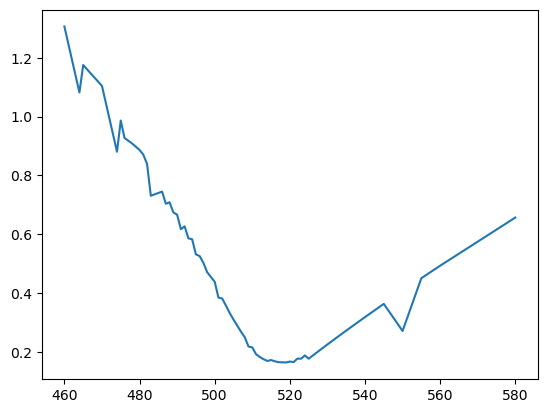

In [29]:
spy_calls = spy_calls[spy_calls['est_iv'].isna()==False].reset_index(drop=True)
plt.plot(spy_calls['strike'], spy_calls['est_iv'])

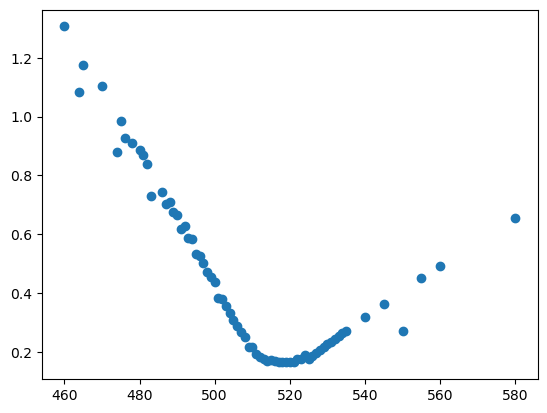

In [31]:
plt.scatter(spy_calls['strike'], spy_calls['est_iv'])

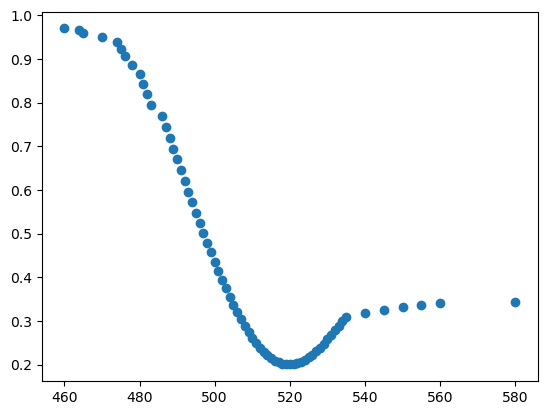

In [35]:
from scipy.ndimage import gaussian_filter1d

y = gaussian_filter1d(spy_calls['est_iv'], 8)
plt.scatter(spy_calls['strike'], y)
plt.show()

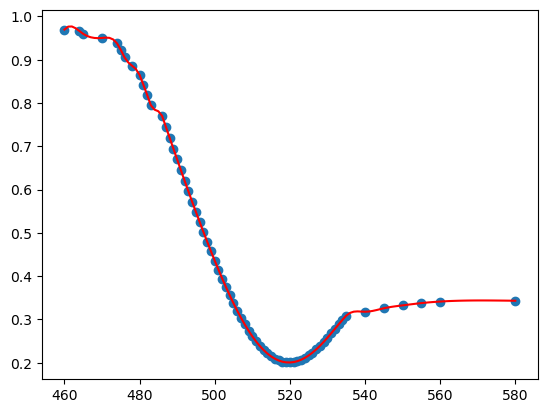

In [36]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(spy_calls['strike'], y)
strike_ar = np.linspace(460, 580, 121)

y_interp = cs(strike_ar)
plt.scatter(spy_calls['strike'], y)
plt.plot(strike_ar, y_interp, c='r')

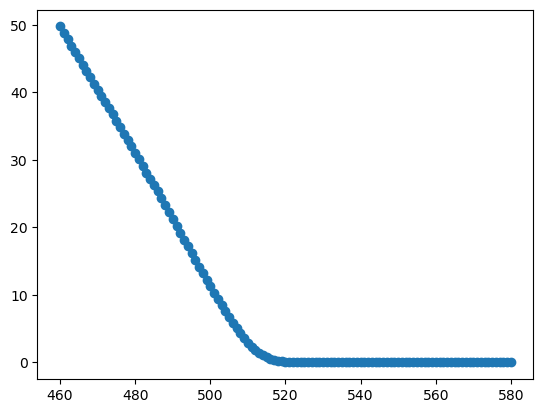

In [40]:
spy_interp_prices = {}
for i in range(strike_ar.shape[0]):
    sp = strike_ar[i]
    iv = y_interp[i]
    p = bs_call(509.05, sp, 1/252, r, iv)
    spy_interp_prices[sp] = p

plt.scatter(spy_interp_prices.keys(), spy_interp_prices.values())

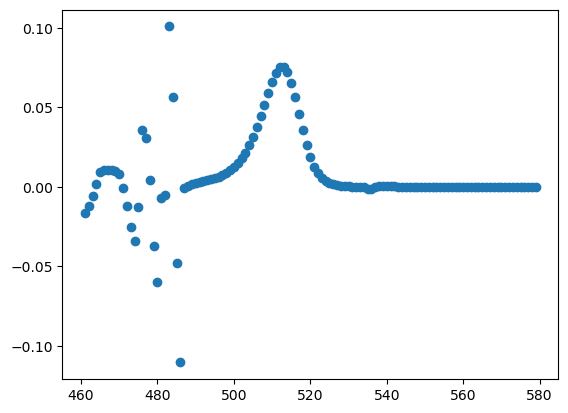

In [42]:
x = []
probs = []
for i in range(strike_ar.shape[0]):
    if i == 0 or i == strike_ar.shape[0]-1:
        continue
    sp = strike_ar[i]
    p = spy_interp_prices[sp-1] - 2 * spy_interp_prices[sp] + spy_interp_prices[sp+1]
    x.append(sp)
    probs.append(p)

plt.scatter(x,probs)

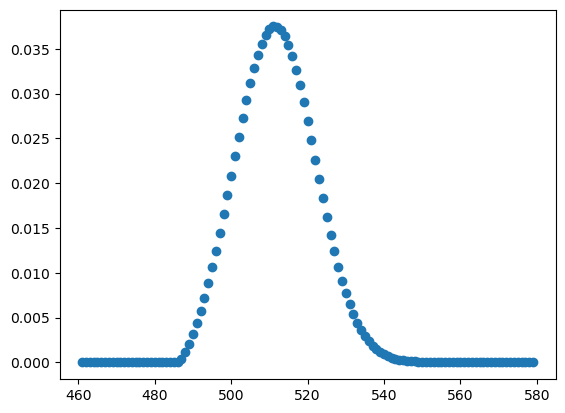

In [47]:
y = gaussian_filter1d(probs, 9)
y_ = np.clip(y, 0, 1)
plt.scatter(x, y_)
plt.show()

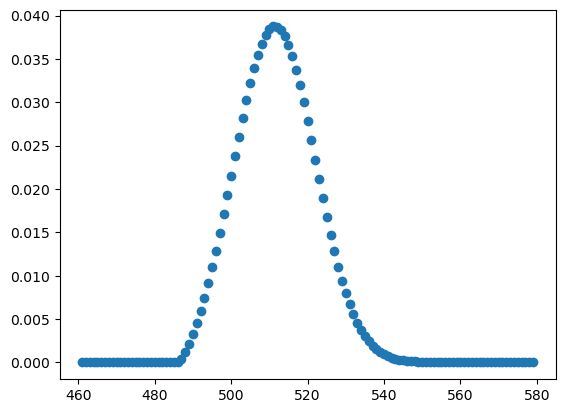

In [49]:
y_ = np.array(y_)/sum(y_)
plt.scatter(x, y_)
plt.show()

In [52]:
import bisect

sum(y_[:bisect.bisect_left(x, 520)])

0.7751120907610933

In [63]:
yf.Ticker('SPY').option_chain('2024-03-07').calls['openInterest'].describe()

count      74.000000
mean     1314.729730
std      2120.411677
min         0.000000
25%         6.250000
50%       106.500000
75%      2050.000000
max      7604.000000
Name: openInterest, dtype: float64

In [80]:
df = yf.Ticker('SPY').history(period='1y')
df['delta'] = df.apply(lambda x: x['Close']-x['Open'], axis=1)
df['delta'].describe()

count    252.000000
mean       0.239891
std        2.769995
min       -8.057530
25%       -1.324988
50%        0.353579
75%        1.920096
max        9.150897
Name: delta, dtype: float64

In [82]:
spy = yf.Ticker('SPY').option_chain('2024-03-07').calls[9:50].reset_index(drop=True)
spy = spy[['strike', 'bid', 'ask']]
spy['midprice'] = spy.apply(lambda x: (x['bid']+x['ask'])/2, axis=1)
spy

,strike,bid,ask,midprice
0,474.0,35.97,36.34,36.155
1,475.0,34.97,35.34,35.155
2,476.0,33.97,34.34,34.155
3,478.0,31.98,32.34,32.160
4,480.0,29.98,30.35,30.165
5,481.0,28.98,29.35,29.165
6,482.0,27.98,28.35,28.165
7,483.0,26.98,27.34,27.160
8,486.0,23.98,24.35,24.165
9,487.0,22.98,23.35,23.165


In [84]:
#484, 485,
spy.loc[41] = [477, 32.97, 33.34, 33.16]
spy.loc[42] = [479, 30.98, 31.35, 31.17]
spy.loc[43] = [484, 25.98, 26.35, 26.17]
spy.loc[44] = [485, 24.98, 25.35, 25.17]
spy = spy.sort_values(by=['strike'], ignore_index=True)

In [85]:
spy

,strike,bid,ask,midprice
0,474.0,35.97,36.34,36.155
1,475.0,34.97,35.34,35.155
2,476.0,33.97,34.34,34.155
3,477.0,32.97,33.34,33.160
4,478.0,31.98,32.34,32.160
5,479.0,30.98,31.35,31.170
6,480.0,29.98,30.35,30.165
7,481.0,28.98,29.35,29.165
8,482.0,27.98,28.35,28.165
9,483.0,26.98,27.34,27.160


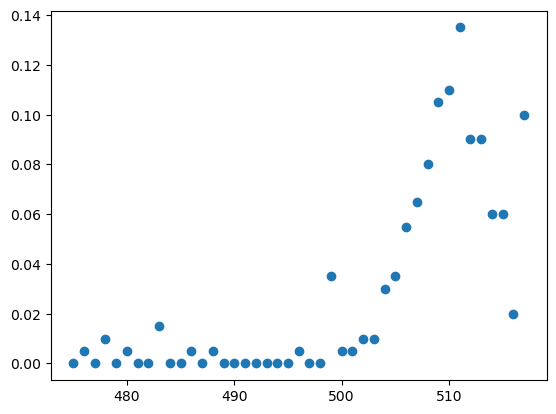

In [88]:
strike = []
p = []

for idx, row in spy.iterrows():
    if idx == 0 or idx == spy.shape[0]-1:
        continue
    cur_s = row['strike']
    cost = float(spy.iloc[idx-1]['midprice']) - 2 * row['midprice'] + float(spy.iloc[idx+1]['midprice'])
    strike.append(cur_s)
    p.append(max(0, cost))

plt.scatter(strike, p)

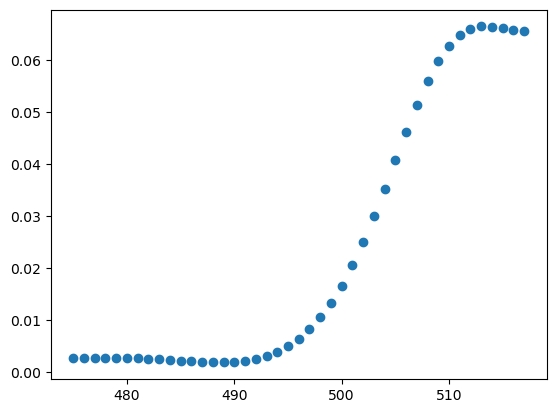

In [92]:
p_smooth = gaussian_filter1d(p, 5)
p_smooth = np.array(p_smooth)/np.sum(p_smooth)
plt.scatter(strike, p_smooth)

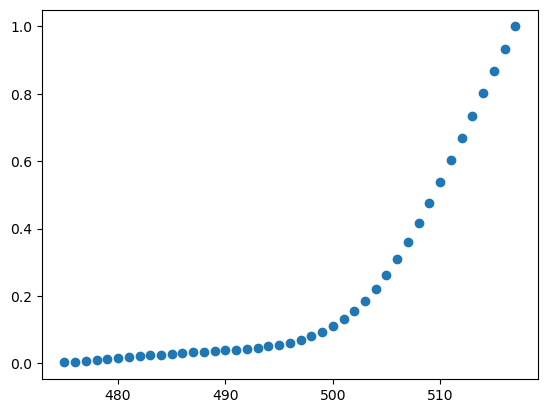

In [94]:
plt.scatter(strike, np.cumsum(p_smooth))

In [116]:
spx_calls = yf.Ticker('^SPX').option_chain('2024-03-07').calls

In [117]:
spx_calls = spx.iloc[10:110].reset_index(drop=True)

In [118]:
spx_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240307C04795000,2024-03-04 19:39:54+00:00,4795.0,353.80,307.0,317.90,0.000000,0.000000,5.0,4,0.604557,True,REGULAR,USD
1,SPXW240307C04800000,2024-03-06 20:21:28+00:00,4800.0,299.03,302.0,312.90,7.899994,2.713562,3.0,21,0.596867,True,REGULAR,USD
2,SPXW240307C04805000,2024-03-06 20:21:28+00:00,4805.0,293.93,298.8,307.90,105.019990,55.592600,NaN,23,0.589176,True,REGULAR,USD
3,SPXW240307C04810000,2024-02-23 21:01:47+00:00,4810.0,284.52,292.0,302.90,0.000000,0.000000,3.0,2,0.581456,True,REGULAR,USD
4,SPXW240307C04825000,2024-03-04 20:12:15+00:00,4825.0,325.68,277.0,288.00,0.000000,0.000000,11.0,9,0.560002,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,SPXW240307C05235000,2024-03-06 21:06:22+00:00,5235.0,0.05,0.0,0.00,-0.120000,-70.588234,399.0,176,0.062509,False,REGULAR,USD
86,SPXW240307C05240000,2024-03-06 21:05:09+00:00,5240.0,0.05,0.0,0.00,-0.120000,-70.588234,398.0,566,0.062509,False,REGULAR,USD
87,SPXW240307C05245000,2024-03-06 21:12:07+00:00,5245.0,0.05,0.0,0.00,-0.100000,-66.666670,243.0,415,0.062509,False,REGULAR,USD
88,SPXW240307C05250000,2024-03-06 21:05:47+00:00,5250.0,0.05,0.0,0.05,-0.100000,-66.666670,236.0,3220,0.138680,False,REGULAR,USD


In [119]:
spx_calls.iloc[40:100]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
40,SPXW240307C05010000,2024-03-06 20:54:10+00:00,5010.0,97.98,95.80,103.30,18.410004,23.136864,34.0,74,0.260139,True,REGULAR,USD
41,SPXW240307C05015000,2024-03-06 19:41:29+00:00,5015.0,90.80,90.90,98.20,33.610004,58.769024,203.0,403,0.250038,True,REGULAR,USD
42,SPXW240307C05020000,2024-03-06 21:02:32+00:00,5020.0,89.20,85.90,93.30,2.399994,2.764970,75.0,156,0.241951,True,REGULAR,USD
43,SPXW240307C05025000,2024-03-06 20:57:01+00:00,5025.0,83.96,81.00,88.30,19.919998,31.105556,73.0,119,0.232735,True,REGULAR,USD
44,SPXW240307C05030000,2024-03-06 21:05:35+00:00,5030.0,78.35,76.10,83.60,22.219997,39.586670,66.0,106,0.226372,True,REGULAR,USD
45,SPXW240307C05035000,2024-03-06 21:10:47+00:00,5035.0,73.42,71.10,78.70,27.099998,58.506042,217.0,99,0.217858,True,REGULAR,USD
46,SPXW240307C05040000,2024-03-06 20:59:14+00:00,5040.0,68.39,66.30,73.70,20.689999,43.375260,82.0,119,0.208229,True,REGULAR,USD
47,SPXW240307C05045000,2024-03-06 21:05:35+00:00,5045.0,63.75,61.40,69.00,24.250000,61.392403,52.0,78,0.201226,True,REGULAR,USD
48,SPXW240307C05050000,2024-03-06 21:08:07+00:00,5050.0,58.53,56.80,64.20,17.169998,41.513535,121.0,2802,0.193032,True,REGULAR,USD
49,SPXW240307C05055000,2024-03-06 20:51:37+00:00,5055.0,55.20,52.00,59.50,15.299999,38.345863,41.0,253,0.185463,True,REGULAR,USD


In [113]:
yf.Ticker('^SPX').option_chain('2024-03-07').puts.iloc[120:]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
120,SPXW240307P05150000,2024-03-06 21:14:00+00:00,5150.0,42.68,38.6,46.1,-31.730003,-42.642120,792.0,736,0.079019,True,REGULAR,USD
121,SPXW240307P05155000,2024-03-06 20:57:59+00:00,5155.0,49.24,43.1,50.7,-21.560001,-30.451977,787.0,78,0.075571,True,REGULAR,USD
122,SPXW240307P05160000,2024-03-06 21:06:35+00:00,5160.0,51.93,47.7,55.2,-48.260002,-48.168480,463.0,70,0.000010,True,REGULAR,USD
123,SPXW240307P05165000,2024-03-06 21:04:27+00:00,5165.0,57.94,52.5,60.1,-47.149998,-44.866306,443.0,62,0.000010,True,REGULAR,USD
124,SPXW240307P05170000,2024-03-06 19:14:30+00:00,5170.0,62.05,57.4,64.9,-42.360004,-40.570827,17.0,52,0.000010,True,REGULAR,USD
125,SPXW240307P05175000,2024-03-06 21:06:35+00:00,5175.0,66.36,62.3,69.8,-24.269997,-26.779211,38.0,23,0.000010,True,REGULAR,USD
126,SPXW240307P05180000,2024-03-06 19:26:02+00:00,5180.0,75.64,67.2,74.7,14.239998,23.192177,1.0,26,0.000010,True,REGULAR,USD
127,SPXW240307P05185000,2024-03-06 17:41:48+00:00,5185.0,60.80,72.1,79.7,-23.890003,-28.208765,1.0,16,0.000010,True,REGULAR,USD
128,SPXW240307P05190000,2024-03-06 20:06:24+00:00,5190.0,86.24,77.1,84.4,-37.790000,-30.468437,13.0,13,0.000010,True,REGULAR,USD
129,SPXW240307P05195000,2024-03-06 20:29:14+00:00,5195.0,94.61,82.0,89.6,32.970000,53.488000,56.0,1,0.000010,True,REGULAR,USD


In [120]:
spx_puts = yf.Ticker('^SPX').option_chain('2024-03-07').puts

In [124]:
spx_puts = spx_puts.iloc[100:].reset_index(drop=True)

In [125]:
spx_calls.columns

Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency'],
      dtype='object')

In [127]:
spx_calls['type'] = spx_calls.apply(lambda x: 'call', axis=1)
spx_calls['midprice'] = spx_calls.apply(lambda x: (x['bid']+x['ask'])/2, axis=1)

spx_calls = spx_calls[['strike', 'midprice', 'type']]

In [126]:
spx_puts.columns

Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency'],
      dtype='object')

In [128]:
spx_puts['type'] = spx_puts.apply(lambda x: 'put', axis=1)
spx_puts['midprice'] = spx_puts.apply(lambda x: (x['bid']+x['ask'])/2, axis=1)

spx_puts = spx_puts[['strike', 'midprice', 'type']]



In [134]:
spx = pd.concat([spx_calls, spx_puts], ignore_index=True)

In [136]:
spx = spx.iloc[:129]

In [137]:
spx

,strike,midprice,type
0,4795.0,312.45,call
1,4800.0,307.45,call
2,4805.0,303.35,call
3,4810.0,297.45,call
4,4825.0,282.50,call
...,...,...,...
124,5220.0,110.85,put
125,5225.0,116.20,put
126,5230.0,121.20,put
127,5240.0,131.50,put
